# Bring's curve

verification of the period matrix given in http://arxiv.org/pdf/1206.6004.pdf [Braden]

In [1]:
# Initialize jupyter notebook. Calling twice allegedly avoids a bug
%matplotlib notebook
%matplotlib notebook 

from cyclepainter import *

In [2]:
# Define the Bring's curve (affine projection)
k.<zeta>=CyclotomicField(5)
A2.<x,y>=AffineSpace(k,2)
curve = x*y^5 + x + x^2*y^2 - x^4*y - 2*y^3

In [3]:
# Define the cohomology basis (top of page 18 in [Braden])
den = (-5*x*y^4 + x^4 - 2*x^2*y + 6*y^2)
diffs = [
    (y^3-x)/den,
    (-x*y^2 + 1)/den,
    (-x^2 + y)/den,
    y*(x^2-y)/den
]

In [4]:
# Automorphism
rot = lambda x, y: (zeta^3*x, zeta*y)

Curve:
    x*y^5 - x^4*y + x^2*y^2 - 2*y^3 + x

Kappa:
    0.6

Monodromy point:
      (-3-0.645883339921j)

Ordering of sheets at the monodromy point:
   (0) (-1.7954479188658412+1.5235528054038223j)
   (1) (-1.3421521819929518-2.0858770276590737j)
   (2) (-0.02785011816641318+0.02043250706275109j)
   (3) (1.3249013864214712+1.791422248098467j)
   (4) (1.8405488326037354-1.2495305329059696j)
Discriminant points:
     0.1194636472710428? - 1.291766679841991?*I
     -0.8559295246662225? - 0.9748422267084831?*I
     0.662633282961647? - 1.115280166810461?*I
     0.3090169943749474? - 0.9510565162951536?*I
     -0.8090169943749474? - 0.5877852522924731?*I
     -1.191626821179914? - 0.5127945370359877?*I
     1.265459415613447? - 0.2855611766409660?*I
     1
     0
     1.265459415613447? + 0.2855611766409660?*I
     0.662633282961647? + 1.115280166810461?*I
     0.3090169943749474? + 0.9510565162951536?*I
     -0.8090169943749474? + 0.5877852522924731?*I
     0.1194636472710428? + 1.29176

<IPython.core.display.Javascript object>


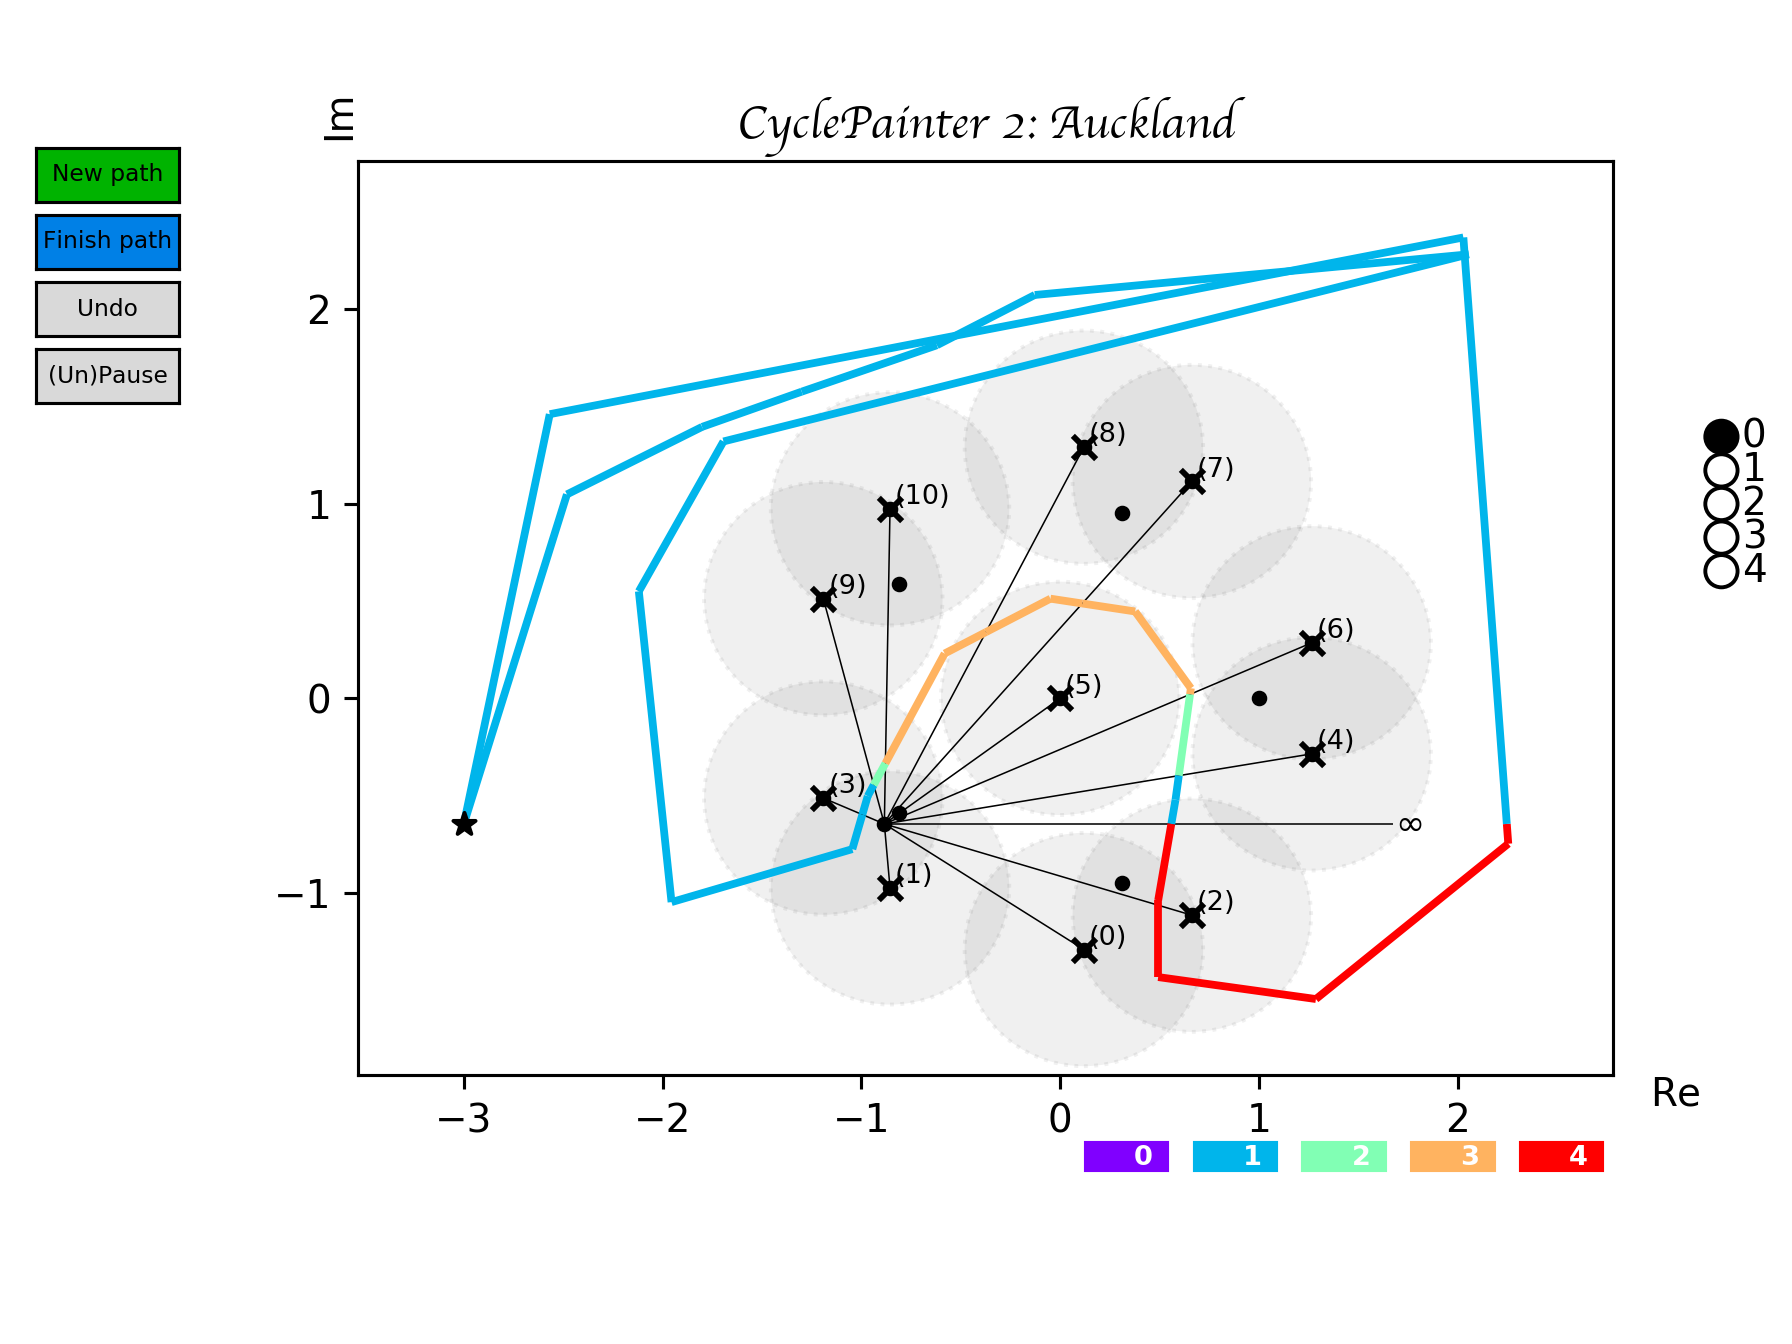

In [5]:
# Load CyclePainter
cp = CyclePainter(curve)
cp.start()

In [6]:
# Load the pre-defined paths. These were hand-replicated using Figure 6 in [Braden] 
# and successive application of the rot automorphism
cp.load_paths('brings_curve_paths.pickle')

In [7]:
cp.saved_paths()

Saved paths:
    a1
    a3
    a2
    a5
    a4
    a7
    a6
    s
    a8


In [8]:
# Show one of these paths
cp.get_path('a8').display()

In [9]:
# This is precisely the intersection matrix from the bottom of page 13 in [Braden]
I = cp.intersection_matrix(['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8'])
I

matrix([[ 0,  1, -1,  1, -1,  0,  1, -1],
        [-1,  0,  1, -1,  1,  0,  0,  0],
        [ 1, -1,  0,  1, -1,  1, -1,  0],
        [-1,  1, -1,  0,  1, -1,  1,  0],
        [ 1, -1,  1, -1,  0,  1, -1,  1],
        [ 0,  0, -1,  1, -1,  0,  1, -1],
        [-1,  0,  1, -1,  1, -1,  0,  1],
        [ 1,  0,  0,  0, -1,  1, -1,  0]])

In [10]:
# We will also need the transormation (4.2) in [Braden], to transform the above paths into a canonical basis
M = np.matrix([
    [1, 0, 0, 0,-2, 0, 1, 0],
    [1,-1, 0,-1,-1, 1, 1, 1],
    [1,-1, 0, 0,-1, 2, 1,-1],
    [0,-1, 0, 0, 1, 2, 0, 0],
    [1,-1, 1, 0,-1, 1,-1,-1],
    [1,-1, 1,-1, 0, 0,-1, 1],
    [1,-1, 1,-1, 0, 1, 0, 1],
    [0,-1, 0,-1, 1, 1, 1, 2]
])

In [11]:
# Verify that M above indeed transforms the paths into a canonical basis
M.T*I*M

matrix([[ 0,  0,  0,  0,  1,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  1,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  1],
        [-1,  0,  0,  0,  0,  0,  0,  0],
        [ 0, -1,  0,  0,  0,  0,  0,  0],
        [ 0,  0, -1,  0,  0,  0,  0,  0],
        [ 0,  0,  0, -1,  0,  0,  0,  0]])

In [12]:
# Calculate the period matrix (using the transormation M)
pm = cp.period_matrix(['a1', 'a2', 'a3', 'a4'], ['a5', 'a6', 'a7', 'a8'], diffs) * M

In [13]:
# Finally, find the Riemann matrix
A, B = pm[:,:4], pm[:,4:]
rm = np.matmul(np.linalg.inv(A), B)

In [14]:
np.round(np.matmul(np.linalg.inv(A), B), 3)

matrix([[-2. +0.747j, -0.5+0.187j,  0.5-0.187j, -0.5+0.187j],
        [-0.5+0.187j, -2. +0.747j, -0.5+0.187j,  0.5-0.187j],
        [ 0.5-0.187j, -0.5+0.187j, -2. +0.747j, -0.5+0.187j],
        [-0.5+0.187j,  0.5-0.187j, -0.5+0.187j, -2. +0.747j]])

In [15]:
# Finally, setting t0, the form of the riemann matrix (1.1) in [Braden] is verified
t0 = np.array(rm)[0][1]
t0

(-0.5000000000211757+0.18667646246018482j)

In [16]:
np.round(rm/t0, 9)

matrix([[ 4.-0.j,  1.-0.j, -1.+0.j,  1.-0.j],
        [ 1.-0.j,  4.-0.j,  1.+0.j, -1.-0.j],
        [-1.-0.j,  1.-0.j,  4.+0.j,  1.+0.j],
        [ 1.-0.j, -1.+0.j,  1.-0.j,  4.+0.j]])